# Regular Genomics Project **RNA Localisation**


In [1]:
from plotting import plot_line_graph
from metrics import pearson, Pearson
from models import CNN
from utils import prepare_data, set_variables

### **1.** Data Preparation

Firstly, we import several necessary packages and load in our data:

In [2]:
train_data, valid_data, test_data = prepare_data()

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


In [3]:
max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
model_name = 'flor_CNN_Att1'
model_architecture_path, model_output_path, params_dataLoader_train, params_dataLoader_valid, params_model, params_train = set_variables(model_name, max_seq_len)

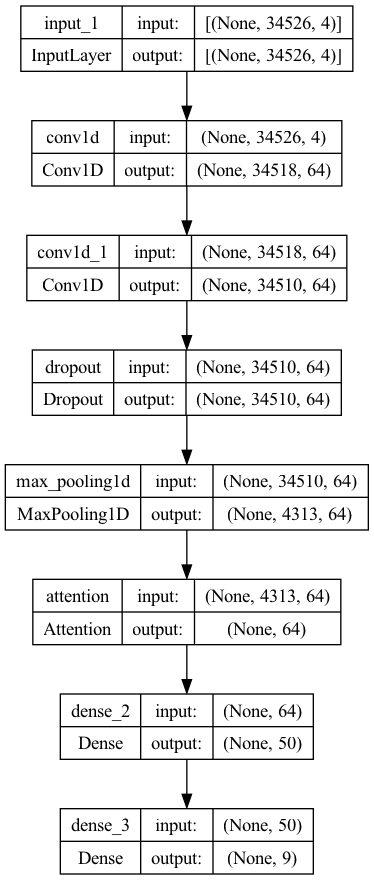

In [4]:
model = CNN(input_size=(max_seq_len, 4),
            params_model=params_model,
            metrics=[Pearson(return_dict=True)]
            )

model.print_model()
# model.summary() #if information about number of params needed

In [5]:
model.summary()

Model: "model"
_________________________________________________________________


 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 34526, 4)]        0         
                                                                 
 conv1d (Conv1D)             (None, 34518, 64)         2304      
                                                                 
 conv1d_1 (Conv1D)           (None, 34510, 64)         36864     
                                                                 
 dropout (Dropout)           (None, 34510, 64)         0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 4313, 64)          0         
 D)                                                              
                                                                 
 attention (Attention)       (None, 64)                7920      
                                                                 
 dense_2 (Dense)             (None, 50)                3250      
          

In [6]:
history = model.fit_and_evaluate(train_data=train_data, eval_data=valid_data,
                                 params_train_dataLoader=params_dataLoader_train,
                                 params_eval_dataLoader=params_dataLoader_valid,
                                 params_train=params_train)

Epoch 1/20
 14/311 [>.............................] - ETA: 8:25 - loss: 6.7744 - ERM: 0.0019 - KDEL: 0.2195 - LMA: 0.0238 - MITO: 0.0897 - NES: -0.0906 - NIK: -0.0334 - NLS: 0.0269 - NUCP: -0.0044 - OMM: -0.0434

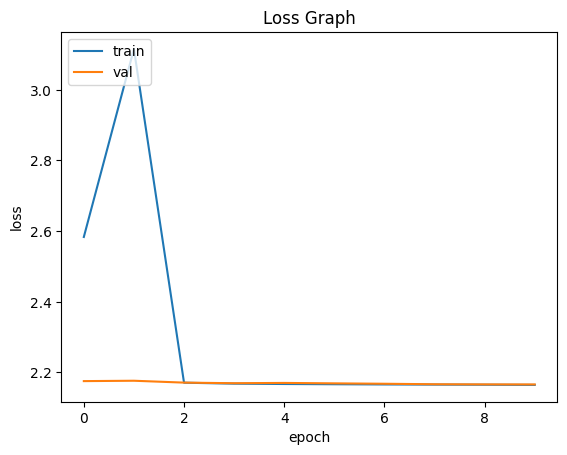

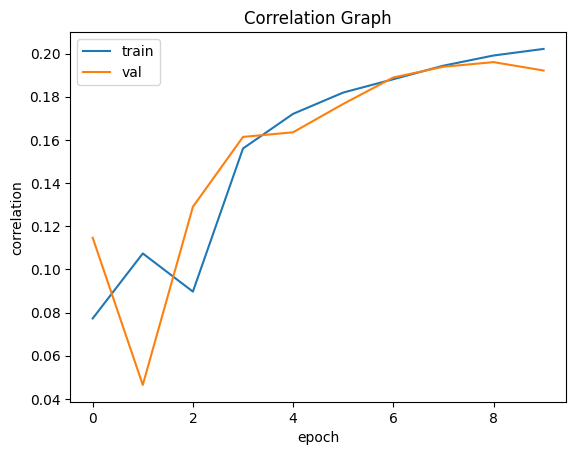

In [7]:
plt_data = [history.history['loss'], history.history['val_loss']]
plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

plt_data = [history.history['pearson'], history.history['val_pearson']]
plot_line_graph(plt_data, "Correlation Graph", 'correlation', 'epoch', ['train', 'val'])

In [8]:
model.print_model(model_architecture_path)
#model.save_model(model_output_path)

NotImplementedError: 
Layer Attention was created by passing
non-serializable argument values in `__init__()`,
and therefore the layer must override `get_config()` in
order to be serializable. Please implement `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2, **kwargs):
        super().__init__(**kwargs)
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config